In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [127]:
#train : 2022-01-01 ~ 2023-04-04 실제 일별 판매량
#sales : 2022-01-01 ~ 2023-04-04 실제 일별 총 판매금액
#brand : 2022-01-01 ~ 2023-04-04 브랜드의 연관키워드 언급량을 정규화한 일별 데이터
#info : 제품 특성 데이터(Text)
train = pd.read_csv('/root/lg-data/train.csv')
sales = pd.read_csv('/root/lg-data/sales.csv')
info = pd.read_csv('/root/lg-data/product_info.csv')
brand = pd.read_csv('/root/lg-data/brand_keyword_cnt.csv')

##### 제품

In [130]:
train['제품'].value_counts()

B002-00070-00009    2
B002-01083-00002    2
B002-03481-00001    2
B002-03796-00008    2
B002-01523-00045    2
                   ..
B002-01277-00015    1
B002-01277-00016    1
B002-01277-00017    1
B002-01277-00018    1
B002-03799-00010    1
Name: 제품, Length: 15840, dtype: int64

In [132]:
#제품 겹치는 경우
print(len(train[train.duplicated(['제품'], keep=False)]))
#제품 같 & 소분류만 다른 경우
print(len(train[train.duplicated(['제품','대분류','중분류','브랜드'], keep=False)]))
#제품 같 & 브랜드만 다른 경우
print(len(train[train.duplicated(['제품','대분류','중분류','소분류'], keep=False)]))

100
66
34


In [133]:
#유형1 : 제품 같 & 소분류만 다른 경우
train[train['제품']=='B002-01456-00002']
#이 제품의 경우 2022-12-20 ~ 2022-12-25 쯤을 기준으로 소분류 분류 기준 변경?
#이 기간 이전에는 5792에만 판매량 O / 이후에는 5793에만 판매량 O

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07,2022-05-08,2022-05-09,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-1

In [8]:
#유형2 : 제품 같 & 브랜드만 다른 경우
train[train['제품']=='B002-01523-00013']
#이 제품의 경우 2023-02-08 기준으로 브랜드 변경 -> 브랜드 이름이 바뀐건지? 브랜드 데이터 살펴보기
#이 기간 이전에는 5999에만 판매량 O / 이후에는 6000에만 판매량 O

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07,2022-05-08,2022-05-09,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-1

In [33]:
sub_train_1 = train[train.duplicated(['제품','대분류','중분류','소분류'], keep=False)].groupby('제품')['브랜드'].apply(list)
sub_train_1

제품
B002-00616-00003    [B002-00616, B002-02656]
B002-01158-00001    [B002-01158, B002-02376]
B002-01523-00008    [B002-01523, B002-02908]
B002-01523-00012    [B002-01523, B002-02908]
B002-01523-00013    [B002-01523, B002-02908]
B002-01523-00045    [B002-01523, B002-02908]
B002-01950-00022    [B002-01950, B002-02656]
B002-02005-00002    [B002-02005, B002-03122]
B002-02232-00002    [B002-00669, B002-02232]
B002-02232-00003    [B002-00669, B002-02232]
B002-02232-00004    [B002-00669, B002-02232]
B002-02232-00005    [B002-00669, B002-02232]
B002-02232-00006    [B002-00669, B002-02232]
B002-02232-00007    [B002-00669, B002-02232]
B002-02232-00009    [B002-00669, B002-02232]
B002-02232-00027    [B002-00669, B002-02232]
B002-03129-00001    [B002-01322, B002-03129]
Name: 브랜드, dtype: object

In [85]:
result = []
for value in sub_train_1:
    if value not in result:
        result.append(value)
result

[['B002-00616', 'B002-02656'],
 ['B002-01158', 'B002-02376'],
 ['B002-01523', 'B002-02908'],
 ['B002-01950', 'B002-02656'],
 ['B002-02005', 'B002-03122'],
 ['B002-00669', 'B002-02232'],
 ['B002-01322', 'B002-03129']]

In [103]:
#'B002-01523-00013' -> 2023-02-08 기준으로 브랜드 변경
sub_brand_1 = brand[(brand['브랜드']==result[2][0])|(brand['브랜드']==result[2][1])]
sub_brand_1

,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07,2022-05-08,2022-05-09,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,20

In [102]:
sub_train_2 = train[train['제품']=='B002-01523-00013']
sub_train_2

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07,2022-05-08,2022-05-09,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-1

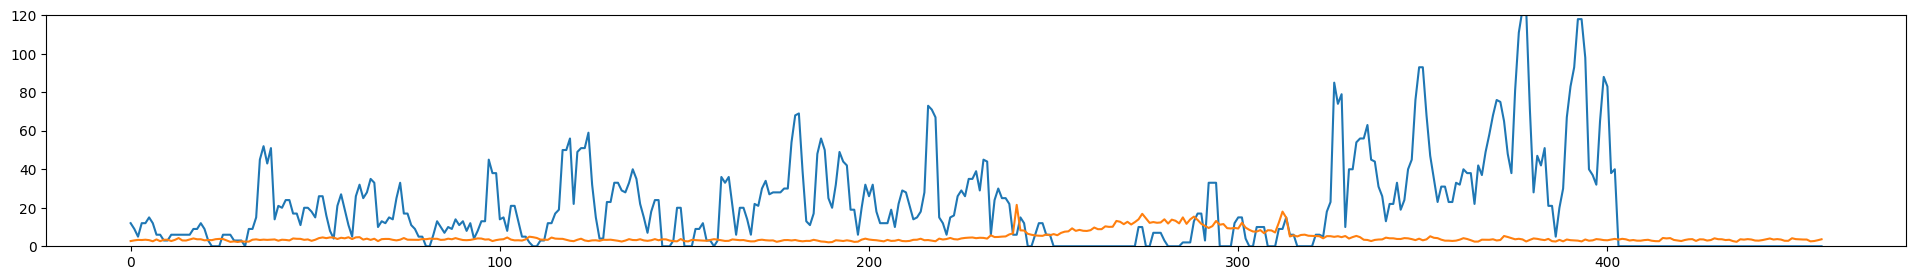

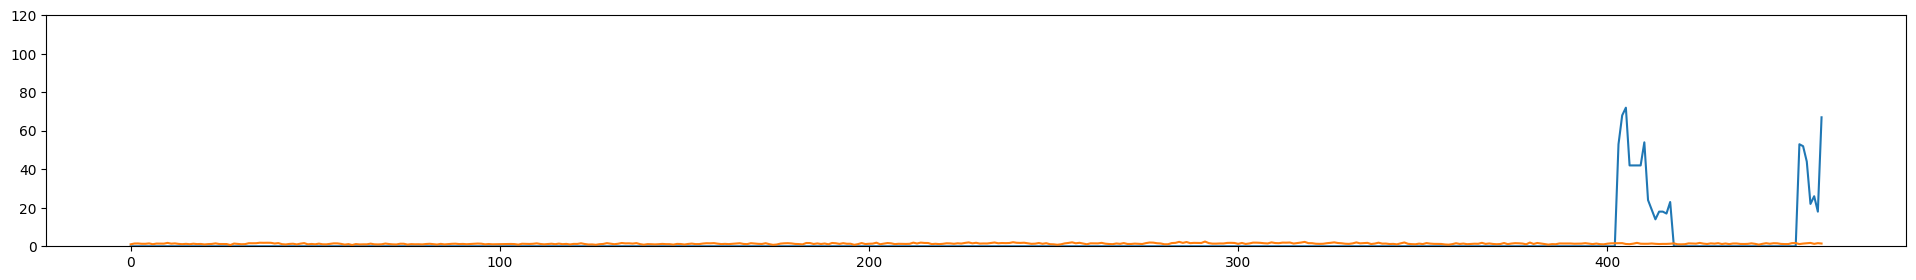

In [111]:
for i in range(2):
  # 날짜별 판매량
  val = np.array(sub_train_2.iloc[i, 6:])

  # 해당 브랜드의 날짜별 언급량
  trend = np.array(sub_brand_1)[i][1:]

  time = np.arange(0, 459, 1)
  plt.figure(figsize=(24, 3))
  plt.ylim([0, 120])
  plt.plot(time, val)
  plt.plot(time, trend)
  plt.show()

##### 제품특성

같은 제품인데 용량 or 향 or 색상만 다른 제품 → 어떻게 확인할지?
- info에 제품코드 
- info에 모든 제품에 대한 정보가 있는 것이 아님

In [125]:
info.head(15)

,제품,제품특성
0,B002-03509-00001,제품유형:일반식품 콜라겐 펩타이드:1000mg 종류:어류 분자량:300Da 섭취대상...
1,B002-02376-00001,700mg x 28정
2,B002-03735-00001,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭...
3,B002-03735-00003,제품타입:정 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 섭...
4,B002-02769-00001,HCA:900mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...
5,B002-02769-00002,제품유형:일반식품 섭취대상:성인남녀 제품타입:액상 제품용량:7일분 섭취횟수:하루 한...
6,B002-03432-00001,섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 두 번 1일 총 섭취량:2포 제...
7,B002-01075-00001,"제품타입섭취방법섭취대상섭취횟수1일 총 섭취량제품용량주요 기능성(식약처인증):정, 생..."
8,B002-02925-00001,제품타입:캡슐 섭취방법:물과 함께 섭취대상:성인남녀 섭취횟수:하루 한 번 1일 총 ...
9,B002-00771-00001,HCA:800mg 영양소 원료명(식약처고시):비타민B1 영양소 원료명(식약처고시):...


In [29]:
#제품만 다르고 대분류, 중분류, 소분류, 브랜드 모두 같은 경우
train[train.duplicated(['대분류','중분류','소분류','브랜드'], keep=False)]

,ID,제품,대분류,중분류,소분류,브랜드,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07,2022-05-08,2022-05-09,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-1

In [11]:
info[info['제품']=='B002-03799-00003']

,제품,제품특성


In [12]:
info[info['제품']=='B002-03799-00004']

,제품,제품특성
4836,B002-03799-00004,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG508S3


In [13]:
info[info['제품']=='B002-03799-00005']

,제품,제품특성
4837,B002-03799-00005,종류:이유식보관용기 특징:전자레인지사용 재질:실리콘 3개세트 LLG509S3


##### 가격

In [14]:
sales.loc[:,'2022-01-01':]/train.loc[:,'2022-01-01':]

,2022-01-01,2022-01-02,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07,2022-01-08,2022-01-09,2022-01-10,2022-01-11,2022-01-12,2022-01-13,2022-01-14,2022-01-15,2022-01-16,2022-01-17,2022-01-18,2022-01-19,2022-01-20,2022-01-21,2022-01-22,2022-01-23,2022-01-24,2022-01-25,2022-01-26,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05,2022-02-06,2022-02-07,2022-02-08,2022-02-09,2022-02-10,2022-02-11,2022-02-12,2022-02-13,2022-02-14,2022-02-15,2022-02-16,2022-02-17,2022-02-18,2022-02-19,2022-02-20,2022-02-21,2022-02-22,2022-02-23,2022-02-24,2022-02-25,2022-02-26,2022-02-27,2022-02-28,2022-03-01,2022-03-02,2022-03-03,2022-03-04,2022-03-05,2022-03-06,2022-03-07,2022-03-08,2022-03-09,2022-03-10,2022-03-11,2022-03-12,2022-03-13,2022-03-14,2022-03-15,2022-03-16,2022-03-17,2022-03-18,2022-03-19,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29,2022-03-30,2022-03-31,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,2022-04-11,2022-04-12,2022-04-13,2022-04-14,2022-04-15,2022-04-16,2022-04-17,2022-04-18,2022-04-19,2022-04-20,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30,2022-05-01,2022-05-02,2022-05-03,2022-05-04,2022-05-05,2022-05-06,2022-05-07,2022-05-08,2022-05-09,2022-05-10,2022-05-11,2022-05-12,2022-05-13,2022-05-14,2022-05-15,2022-05-16,2022-05-17,2022-05-18,2022-05-19,2022-05-20,2022-05-21,2022-05-22,2022-05-23,2022-05-24,2022-05-25,2022-05-26,2022-05-27,2022-05-28,2022-05-29,2022-05-30,2022-05-31,2022-06-01,2022-06-02,2022-06-03,2022-06-04,2022-06-05,2022-06-06,2022-06-07,2022-06-08,2022-06-09,2022-06-10,2022-06-11,2022-06-12,2022-06-13,2022-06-14,2022-06-15,2022-06-16,2022-06-17,2022-06-18,2022-06-19,2022-06-20,2022-06-21,2022-06-22,2022-06-23,2022-06-24,2022-06-25,2022-06-26,2022-06-27,2022-06-28,2022-06-29,2022-06-30,2022-07-01,2022-07-02,2022-07-03,2022-07-04,2022-07-05,2022-07-06,2022-07-07,2022-07-08,2022-07-09,2022-07-10,2022-07-11,2022-07-12,2022-07-13,2022-07-14,2022-07-15,2022-07-16,2022-07-17,2022-07-18,2022-07-19,2022-07-20,2022-07-21,2022-07-22,2022-07-23,2022-07-24,2022-07-25,2022-07-26,2022-07-27,2022-07-28,2022-07-29,2022-07-30,2022-07-31,2022-08-01,2022-08-02,2022-08-03,2022-08-04,2022-08-05,2022-08-06,2022-08-07,2022-08-08,2022-08-09,2022-08-10,2022-08-11,2022-08-12,2022-08-13,2022-08-14,2022-08-15,2022-08-16,2022-08-17,2022-08-18,2022-08-19,2022-08-20,2022-08-21,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-27,2022-08-28,2022-08-29,2022-08-30,2022-08-31,2022-09-01,2022-09-02,2022-09-03,2022-09-04,2022-09-05,2022-09-06,2022-09-07,2022-09-08,2022-09-09,2022-09-10,2022-09-11,2022-09-12,2022-09-13,2022-09-14,2022-09-15,2022-09-16,2022-09-17,2022-09-18,2022-09-19,2022-09-20,2022-09-21,2022-09-22,2022-09-23,2022-09-24,2022-09-25,2022-09-26,2022-09-27,2022-09-28,2022-09-29,2022-09-30,2022-10-01,2022-10-02,2022-10-03,2022-10-04,2022-10-05,2022-10-06,2022-10-07,2022-10-08,2022-10-09,2022-10-10,2022-10-11,2022-10-12,2022-10-13,2022-10-14,2022-10-15,2022-10-16,2022-10-17,2022-10-18,2022-10-19,2022-10-20,2022-10-21,2022-10-22,2022-10-23,2022-10-24,2022-10-25,2022-10-26,2022-10-27,2022-10-28,2022-10-29,2022-10-30,2022-10-31,2022-11-01,2022-11-02,2022-11-03,2022-11-04,2022-11-05,2022-11-06,2022-11-07,2022-11-08,2022-11-09,2022-11-10,2022-11-11,2022-11-12,2022-11-13,2022-11-14,2022-11-15,2022-11-16,2022-11-17,2022-11-18,2022-11-19,2022-11-20,2022-11-21,2022-11-22,2022-11-23,2022-11-24,2022-11-25,2022-11-26,2022-11-27,2022-11-28,2022-11-29,2022-11-30,2022-12-01,2022-12-02,2022-12-03,2022-12-04,2022-12-05,2022-12-06,2022-12-07,2022-12-08,2022-12-09,2022-12-10,2022-12-11,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24,2022-12-25,2022-12-26,2022-12-27,2022-12-28,2022-12-29,2022-1